In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from networkx.drawing import display
from string import capwords

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.expand_frame_repr", False)

In [52]:
titanic_data = pd.read_csv("./train.csv")
dataset_size = titanic_data.shape
print(f"Dataset has {dataset_size[0]} entries, each with {dataset_size[1]} columns.\n")
dataset_memory = titanic_data.memory_usage()
print(f"Dataset uses {dataset_memory.sum() / 1024:.2f} KB of memory.\n")

Dataset has 891 entries, each with 12 columns.



'Dataset uses 83.66 KB of memory.\n'

In [50]:
column_labels = titanic_data.columns
print("Column labels in the dataset and their corresponding datatypes:")
labels = []
dtypes = []
for i, label in enumerate(column_labels.values):
    labels.append(label)
    dtypes.append(titanic_data.dtypes[label])
columns_info = pd.DataFrame(data=dtypes, columns=["Datatypes"], index=column_labels)
display(columns_info)

Column labels in the dataset and their corresponding datatypes:


,Datatypes
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [43]:
head_rows = titanic_data.head(10)
print("\nFirst 10 rows of the dataset:\n")
display(head_rows)

tail_rows = titanic_data.tail(10)
print("\nLast 10 rows of the dataset:\n")
display(tail_rows)


First 10 rows of the dataset:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



Last 10 rows of the dataset:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


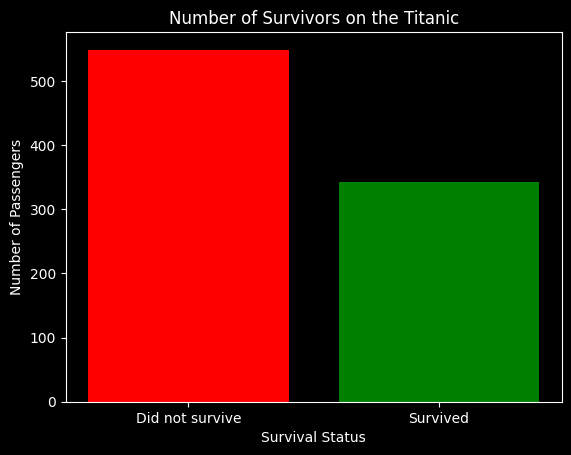

In [41]:
num_survived_passengers = pd.Series(titanic_data.Survived.value_counts().sort_index())
labels = ["Did not survive", "Survived"]
plt.bar(labels, num_survived_passengers, color=["red", "green"])
plt.title("Number of Survivors on the Titanic")
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")
plt.show()


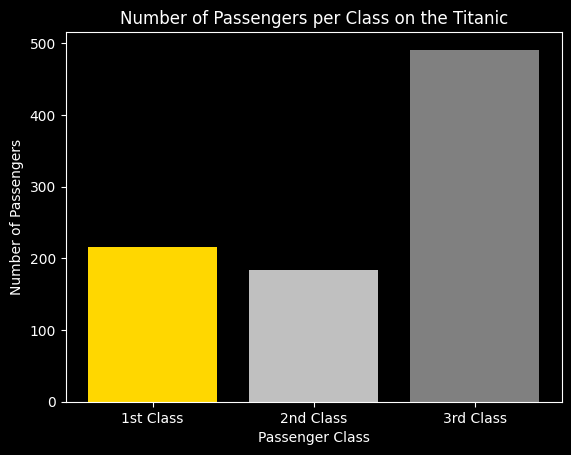

In [54]:
num_passengers_per_class = titanic_data.Pclass.value_counts().sort_index()
labels = ["1st Class", "2nd Class", "3rd Class"]
plt.bar(labels, num_passengers_per_class, color=["gold", "silver", "gray"])
plt.title("Number of Passengers per Class on the Titanic")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.show()

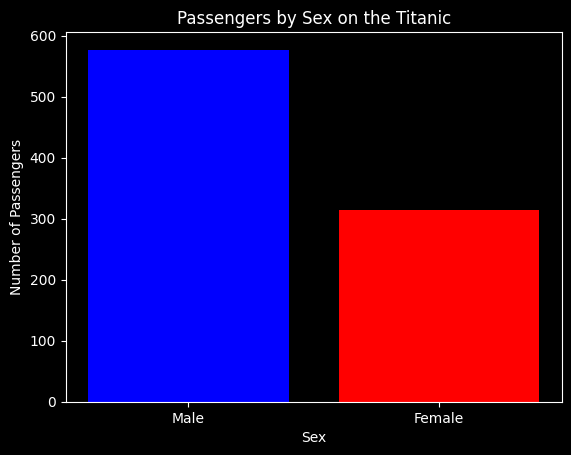

In [57]:
gendered_passengers = titanic_data.Sex.value_counts()
labels = list(map(lambda sex : (str(sex)).capitalize(), gendered_passengers.index.to_list()))
plt.bar(labels, gendered_passengers, color=["blue", "red"])
plt.title("Passengers by Sex on the Titanic")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.show()

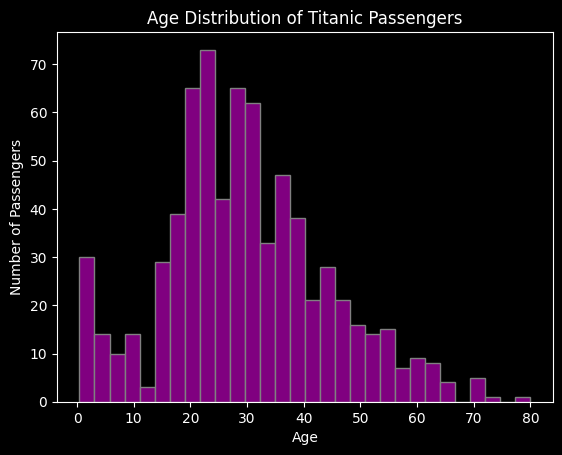

In [61]:
passenger_ages = titanic_data.Age.dropna()
plt.hist(passenger_ages, bins=30, color="purple", edgecolor="gray")
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

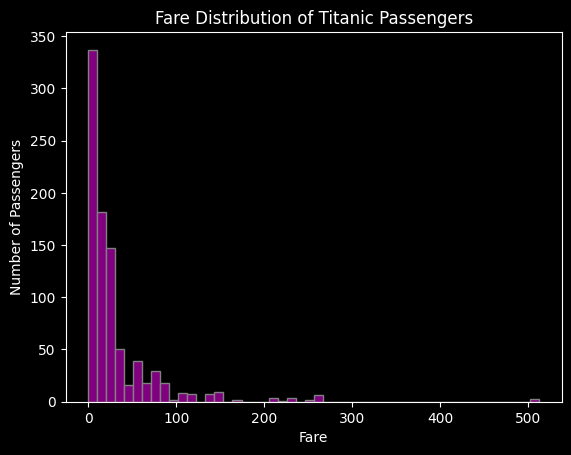

In [70]:
passenger_fairs = titanic_data.Fare.dropna()
plt.hist(passenger_fairs, bins=50, color="purple", edgecolor="gray")
plt.title("Fare Distribution of Titanic Passengers")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.show()

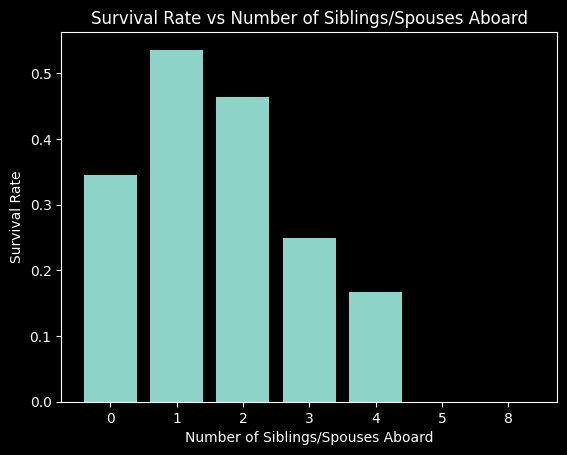

In [79]:
# Relationship between Number of Siblings/Spouses and Death Rate
stats = titanic_data.groupby("SibSp")["Survived"].sum() # Get number of survivors per SibSp value
stats = stats/titanic_data["SibSp"].value_counts().sort_index() # Normalize
labels = [str(i) for i in stats.index.to_list()]
plt.bar(labels, stats)
plt.title("Survival Rate vs Number of Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Survival Rate")
plt.show()

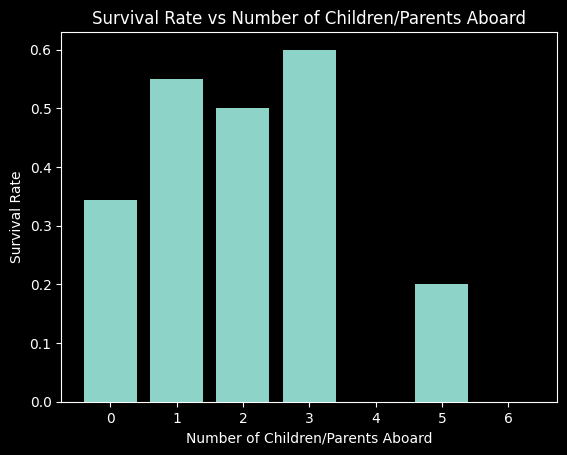

In [80]:
children_parents_stats = titanic_data.groupby("Parch")["Survived"].sum()/titanic_data["Parch"].value_counts().sort_index()
labels = [str(i) for i in children_parents_stats.index.to_list()]
plt.bar(labels, children_parents_stats)
plt.title("Survival Rate vs Number of Children/Parents Aboard")
plt.xlabel("Number of Children/Parents Aboard")
plt.ylabel("Survival Rate")
plt.show()

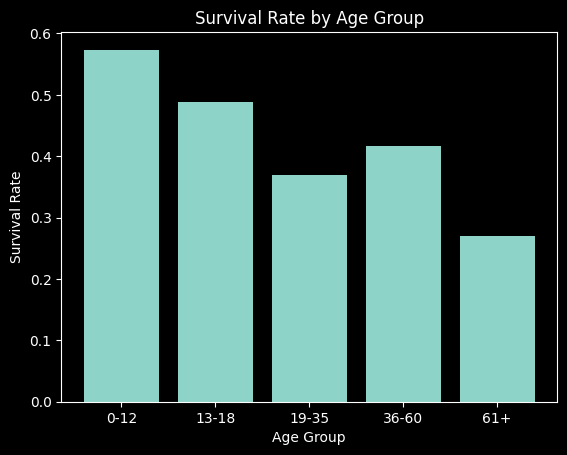

In [89]:
bins = [0, 12, 18, 35, 60, 110]
labels = ["0-12", "13-18", "19-35", "36-60", "61+"]
ages_and_survival = titanic_data.loc[:, ["Age", "Survived"]].dropna()
ages_and_survival["AgeGroup"] = pd.cut(ages_and_survival["Age"], bins=bins, labels=labels, right=False)
ages_and_survival = ages_and_survival.groupby(by="AgeGroup", observed=False)["Survived"].mean()
plt.bar(labels, ages_and_survival)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

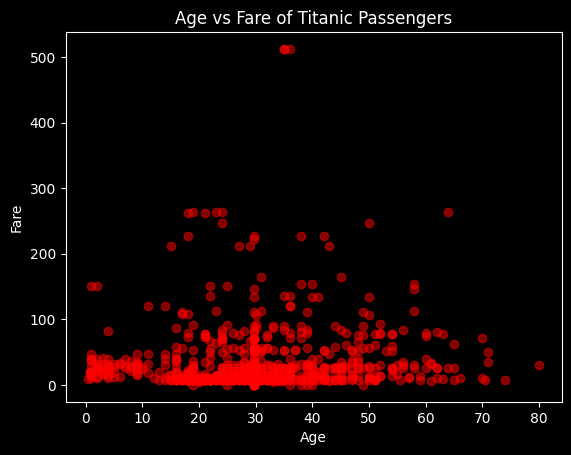

In [92]:
ages = titanic_data.Age
fares = titanic_data.Fare
ages.fillna(ages.mean(), inplace=True)
fares.fillna(fares.mean(), inplace=True)
plt.scatter(ages, fares, alpha=0.5, color="red")
plt.title("Age vs Fare of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

__NO CORRELATION BETWEEN AGE AND FARE__